In [1]:
import os
import sys
import glob
import datetime
import calendar

import numpy as np
import xarray as xr
import scipy
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
DIR_CX = '/glade/scratch/lgchen/data/OISSH_NOAA/biasCorrection_crossoverAdjustment/crossoverFiles_fromEric'
fn_cx = 'cx_c2_j3.nc'

In [3]:
ds_cx = xr.open_dataset(filename_or_obj = DIR_CX + '/' + fn_cx, mask_and_scale = True, decode_times = True)
print(ds_cx)

ds_cx = ds_cx.sortby(ds_cx['time'][:, 0])

sla_diff = ds_cx['sla'][:, 0] - ds_cx['sla'][:, 1]
print('\n\nsla_diff: ', sla_diff)

<xarray.Dataset>
Dimensions:       (xover: 34983, leg: 2, track: 1524)
Coordinates:
    lat           (xover) float64 ...
    lon           (xover) float64 ...
    track         (xover, leg) int32 ...
Dimensions without coordinates: xover, leg
Data variables:
    time          (xover, leg) datetime64[ns] ...
    sla           (xover, leg) float32 ...
    topo          (xover, leg) float32 ...
    satid         (track) int8 ...
    cycle         (track) int16 ...
    pass          (track) int16 ...
    equator_lon   (track) float64 ...
    equator_time  (track) datetime64[ns] ...
    start_time    (track) datetime64[ns] ...
    end_time      (track) datetime64[ns] ...
    nr_xover      (track) int16 ...
    nr_alt        (track) int16 ...
Attributes:
    Conventions:  CF-1.5
    title:        RADS 4.0 crossover file
    institution:  EUMETSAT / NOAA / TU Delft
    references:   RADS Data Manual, Version 4.4.0
    history:      2023-07-20 21:19:04 UTC: radsxogen -d --ymd=20220201,202203.

In [4]:
sla_xo_corr_org = xr.corr(ds_cx['sla'][:, 0], ds_cx['sla'][:, 1])
print('sla_xo_corr_org: ', sla_xo_corr_org.data)

sla_xo_rmsd_org = np.sqrt(np.mean((sla_diff.data)**2))
print('\nsla_xo_rmsd_org: ', sla_xo_rmsd_org)

sla_xo_corr_org:  0.855363453540806

sla_xo_rmsd_org:  0.049903687


Text(0.5, 1.0, 'initial xover-lat relation in cx_c2_j3.nc')

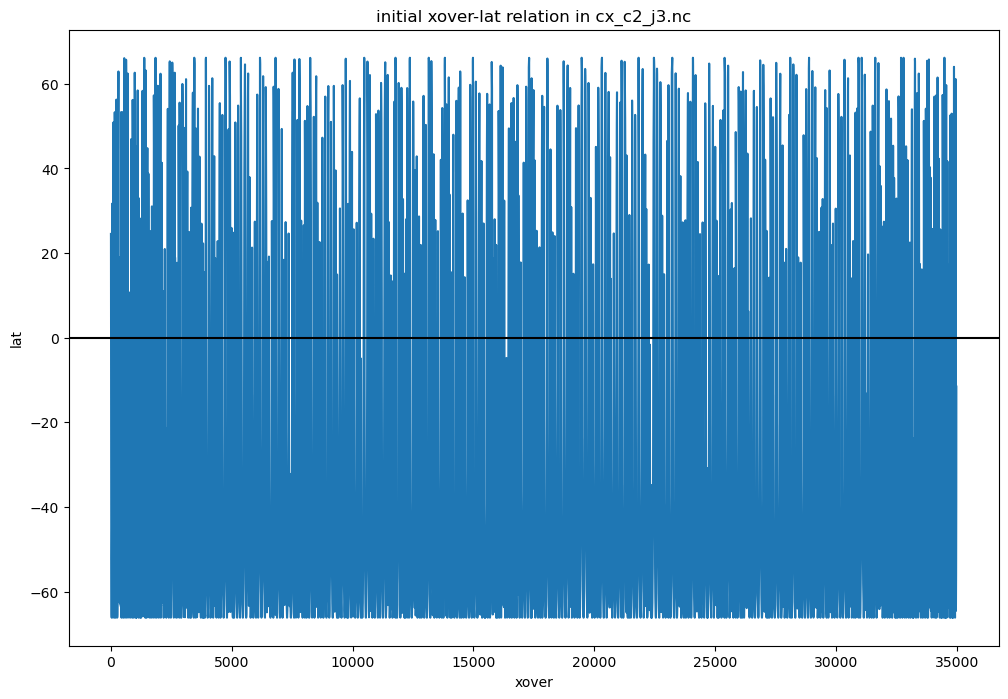

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
x = range(ds_cx.dims['xover'])

# check lat
ax.clear()

ax.plot(x, ds_cx.lat)
ax.axhline(c='k')
ax.set_xlabel('xover')
ax.set_ylabel('lat')
ax.set_title('initial xover-lat relation in cx_c2_j3.nc')
#fig

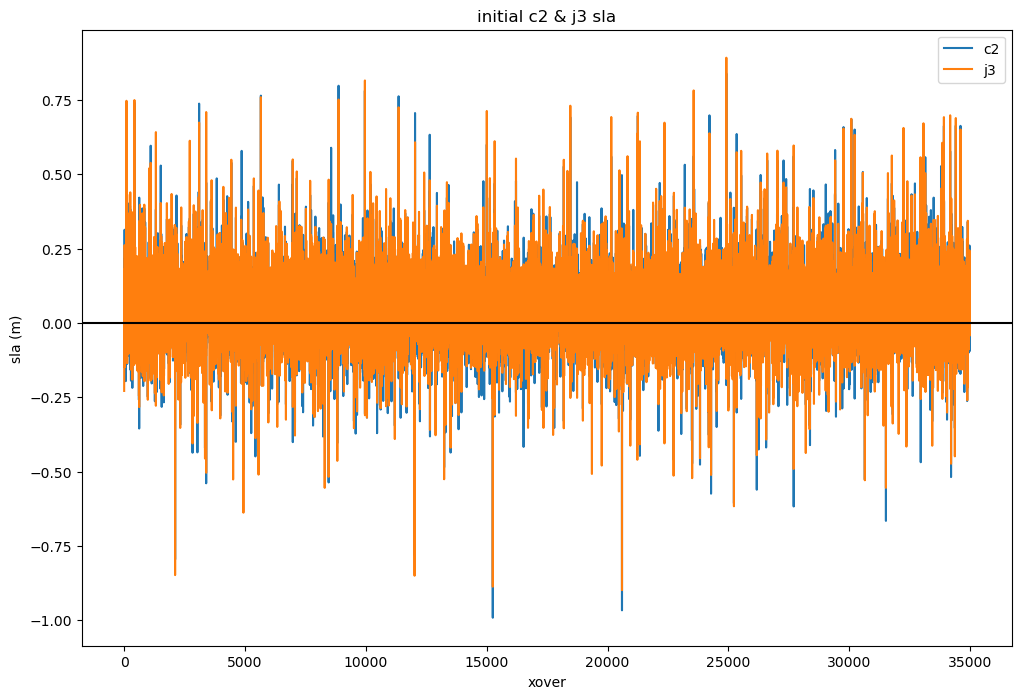

In [7]:
ax.clear()
ax.plot(x, ds_cx['sla'][:, 0], label='c2')
ax.plot(x, ds_cx['sla'][:, 1], label='j3')
ax.axhline(c='k') # if put it before the above plot, the line will be covered and not shown
ax.set_xlabel('xover')
ax.set_ylabel('sla (m)')
ax.set_title('initial c2 & j3 sla')
ax.legend()
fig
#fig.savefig('initial_c2_j3_sla.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


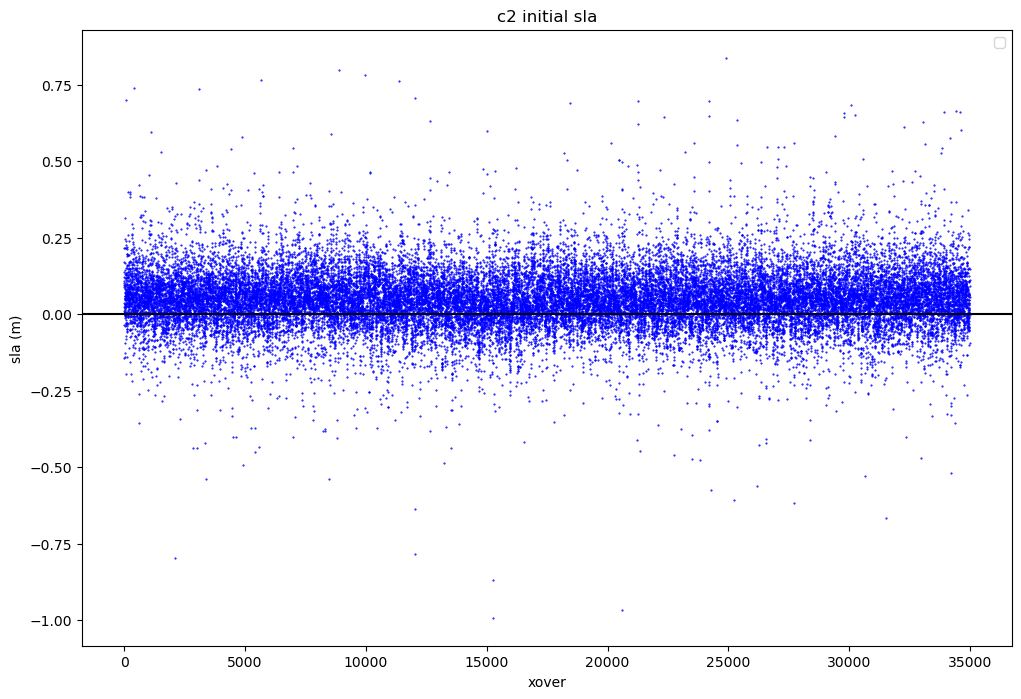

In [9]:
ax.clear()
ax.plot(x, ds_cx['sla'][:, 0], 'bo', markersize=0.5)
# ax.plot(x, ds_cx['sla'][:, 1], label='j3')
ax.axhline(color='k')
ax.set_xlabel('xover')
ax.set_ylabel('sla (m)')
ax.set_title('c2 initial sla')
ax.legend()
fig
#fig.savefig('initial_c2_sla.png')

c2_sla_mean_xo =  0.04931679
c2_sla_std_xo =  0.0940246


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


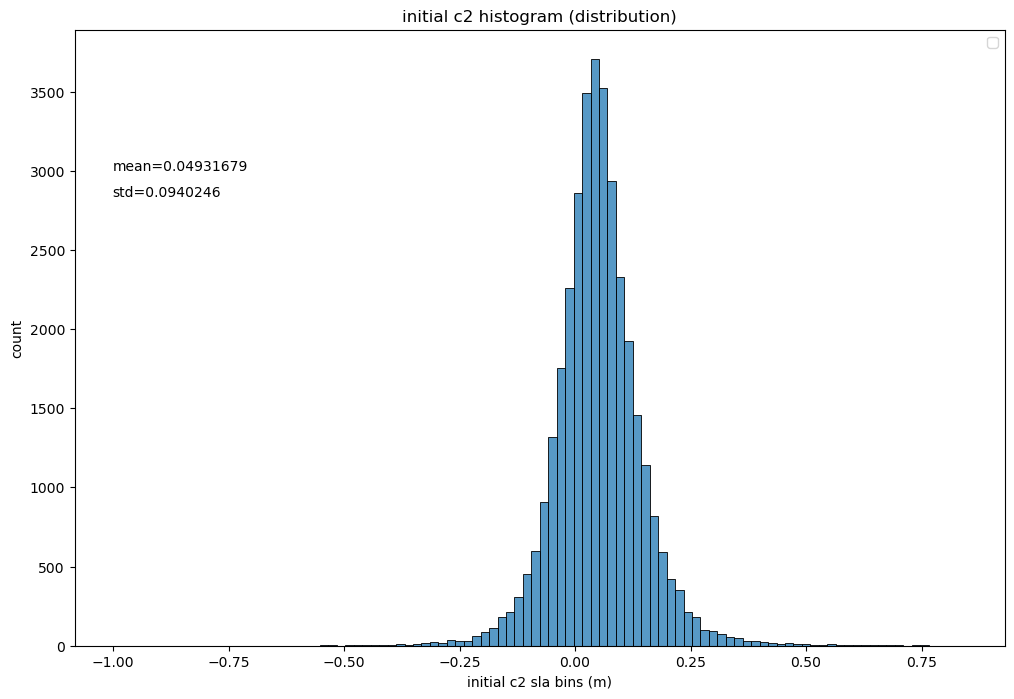

In [11]:
# calculate c2 sla avg, std
c2_sla_mean_xo = np.mean(ds_cx['sla'][:, 0].values)
c2_sla_std_xo = np.std(ds_cx['sla'][:, 0].data)
print('c2_sla_mean_xo = ', c2_sla_mean_xo)
print('c2_sla_std_xo = ', c2_sla_std_xo)

ax.clear()
#ax.hist(ds_cx['sla'][:, 0], bins=100, range=None, density=False, weights=None, cumulative=False
#        , bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None
#        , log=False, color=None, label=None, stacked=False)  # not good.

# ref: https://stackoverflow.com/questions/63895392/seaborn-is-not-plotting-within-defined-subplots
#\sns.displot() is a figure-level function and a FacetGrid, it does not have the ax parameter, 
# so it will not work with matplotlib.pyplot.subplots.
# sns.histplot()is an axes-level function which has the ax parameter, it'll work with matplotlib.pyplot.subplots.
#\It is applicable to any of the seaborn FacetGrid plots that there is no ax parameter. 
# Use the equivalent axes-level plot.
sns.histplot(ds_cx['sla'][:, 0], bins=100, ax=ax)

ax.text(x=-1.0, y=3000, s='mean='+str(c2_sla_mean_xo))  # use data coordinate
ax.text(x=0.04, y=0.73, s='std='+str(c2_sla_std_xo), transform=ax.transAxes)  # use axis coords
ax.set_xlabel('initial c2 sla bins (m)')
ax.set_ylabel('count')
ax.set_title('initial c2 histogram (distribution)')
ax.legend()
fig
# fig.savefig('initial_c2_histogram.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


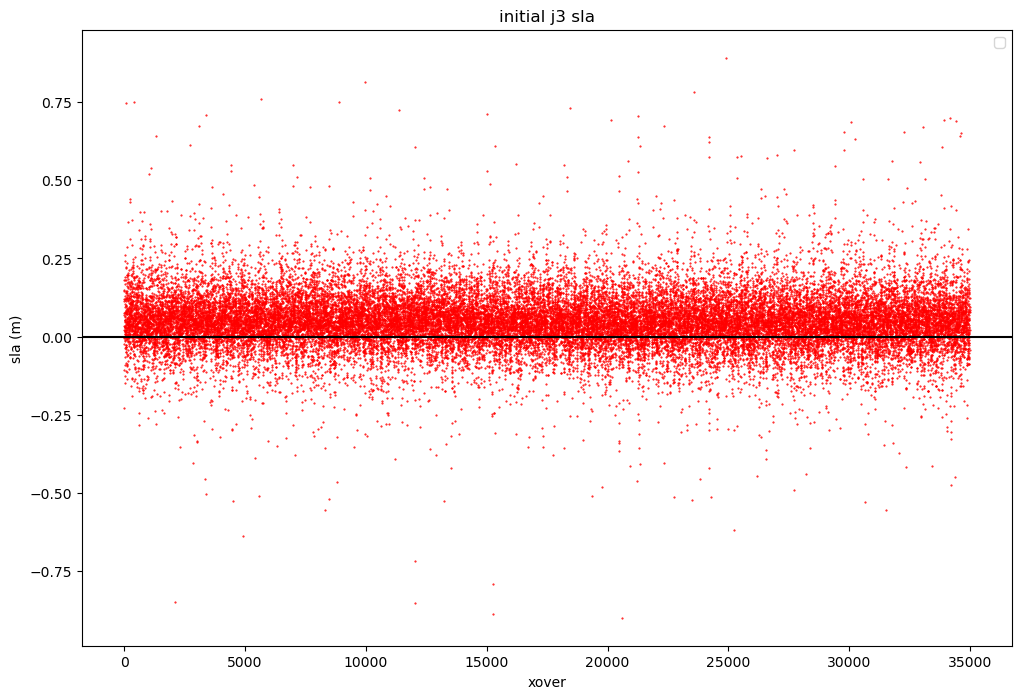

In [13]:
ax.clear()
# ax.plot(x, ds_cx['sla'][:, 0], 'bo', markersize=0.5)
ax.plot(x, ds_cx['sla'][:, 1], 'ro', markersize=0.5)
ax.axhline(color='k')
ax.set_xlabel('xover')
ax.set_ylabel('sla (m)')
ax.set_title('initial j3 sla')
ax.legend()
fig
#fig.savefig('initial_j3_sla.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


j3_sla_mean_xo =  0.050196406
j3_sla_std_xo =  0.09124991


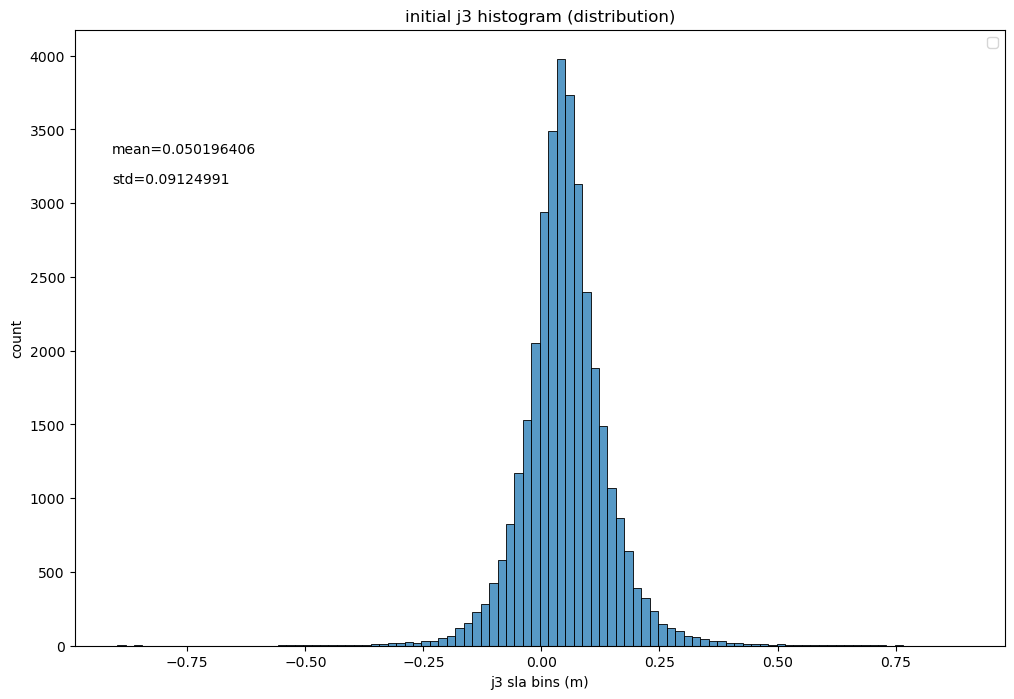

In [15]:
# calculate j3 sla avg, std
j3_sla_mean_xo = np.mean(ds_cx['sla'][:, 1].values)
j3_sla_std_xo = np.std(ds_cx['sla'][:, 1].data)
print('j3_sla_mean_xo = ', j3_sla_mean_xo)
print('j3_sla_std_xo = ', j3_sla_std_xo)

ax.clear()
sns.histplot(ds_cx['sla'][:, 1], bins=100, ax=ax)

# both use axis coords which is easier to control
ax.text(x=0.04, y=0.80, s='mean='+str(j3_sla_mean_xo), transform=ax.transAxes)  
ax.text(x=0.04, y=0.75, s='std='+str(j3_sla_std_xo), transform=ax.transAxes)  
ax.set_xlabel('j3 sla bins (m)')
ax.set_ylabel('count')
ax.set_title('initial j3 histogram (distribution)')
ax.legend()
fig
#fig.savefig('initial_j3_histogram.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


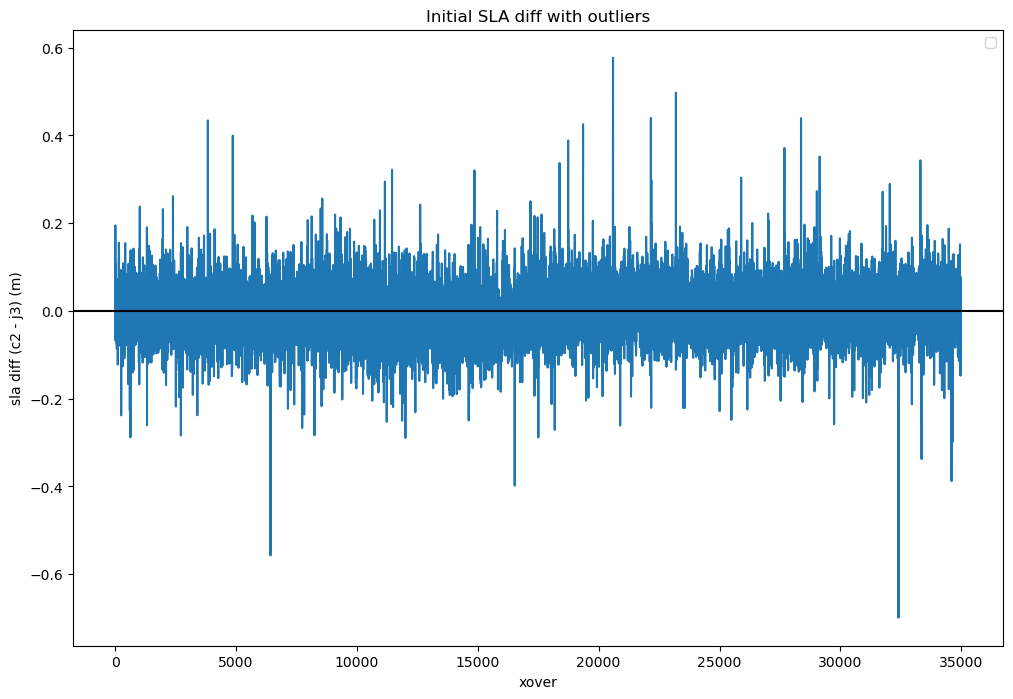

In [17]:
ax.clear()
# ax.plot(x, ds_cx['sla'][:, 0] - ds_cx['sla'][:, 1])
ax.plot(x, sla_diff)
ax.axhline(c='k')
ax.set_xlabel('xover')
ax.set_ylabel('sla diff (c2 - j3) (m)')
ax.set_title('Initial SLA diff with outliers')
ax.legend()
fig
#fig.savefig('initial_sla_diff.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


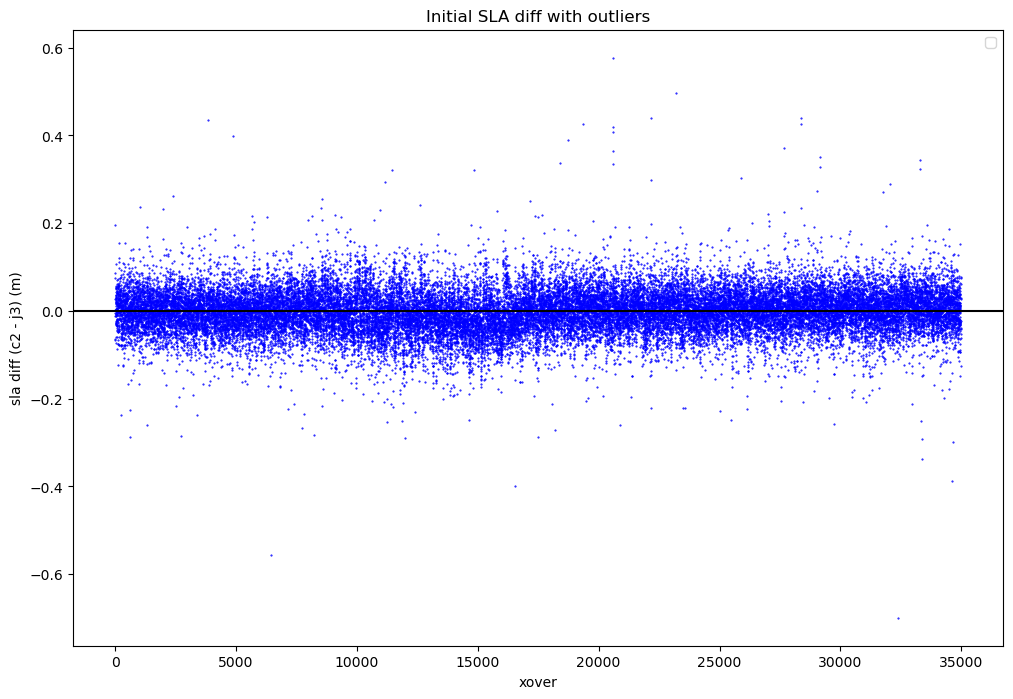

In [19]:
ax.clear()
ax.plot(x, sla_diff, 'bo', markersize=0.5)
ax.axhline(c='k')
ax.set_xlabel('xover')
ax.set_ylabel('sla diff (c2 - j3) (m)')
ax.set_title('Initial SLA diff with outliers')
ax.legend()
fig
#fig.savefig('initial_sla_diff_02.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


sla_diff_mean_xo =  -0.0008796243
sla_diff_std_xo =  0.04989594


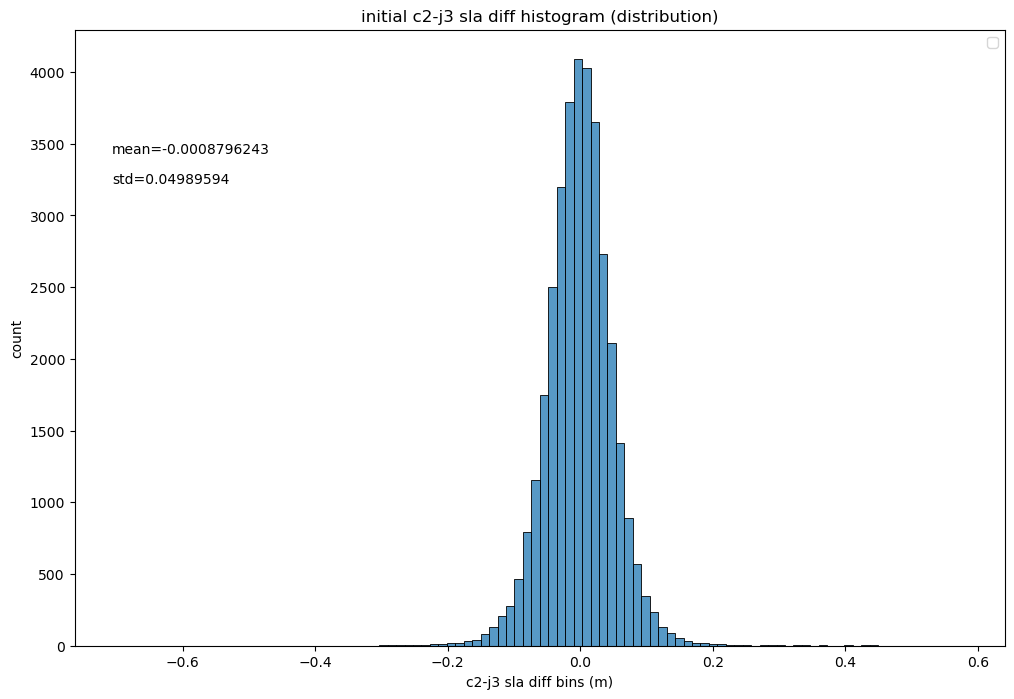

In [21]:
# calculate sla diff sla avg, std
sla_diff_mean_xo = np.mean(sla_diff.values)
sla_diff_std_xo = np.std(sla_diff.data)
print('sla_diff_mean_xo = ', sla_diff_mean_xo)
print('sla_diff_std_xo = ', sla_diff_std_xo)

ax.clear()
sns.histplot(sla_diff, bins=100, ax=ax)

# both use axis coords which is easier to control
ax.text(x=0.04, y=0.80, s='mean='+str(sla_diff_mean_xo), transform=ax.transAxes)  
ax.text(x=0.04, y=0.75, s='std='+str(sla_diff_std_xo), transform=ax.transAxes)  
ax.set_xlabel('c2-j3 sla diff bins (m)')
ax.set_ylabel('count')
ax.set_title('initial c2-j3 sla diff histogram (distribution)')
ax.legend()
fig
#fig.savefig('initial_sla_diff_histogram.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[322, 334, 335, 329, 334, 338, 333, 336, 336, 338, 344, 332, 339, 338, 336, 334, 330, 325, 339, 333, 345, 334, 333, 337, 328, 328, 345, 345, 334, 335]
[0.009204470742932281, 0.009547494497327273, 0.009576079810193523, 0.009404567932996027, 0.009547494497327273, 0.00966183574879227, 0.009518909184461024, 0.009604665123059773, 0.009604665123059773, 0.00966183574879227, 0.009833347625989766, 0.009490323871594774, 0.00969042106165852, 0.00966183574879227, 0.009604665123059773, 0.009547494497327273, 0.009433153245862276, 0.00929022668153103, 0.00969042106165852, 0.009518909184461024, 0.009861932938856016, 0.009547494497327273, 0.009518909184461024, 0.00963325043592602, 0.009375982620129777, 0.009375982620129777, 0.009861932938856016, 0.009861932938856016, 0.009547494497327273, 0.009576079810193523]


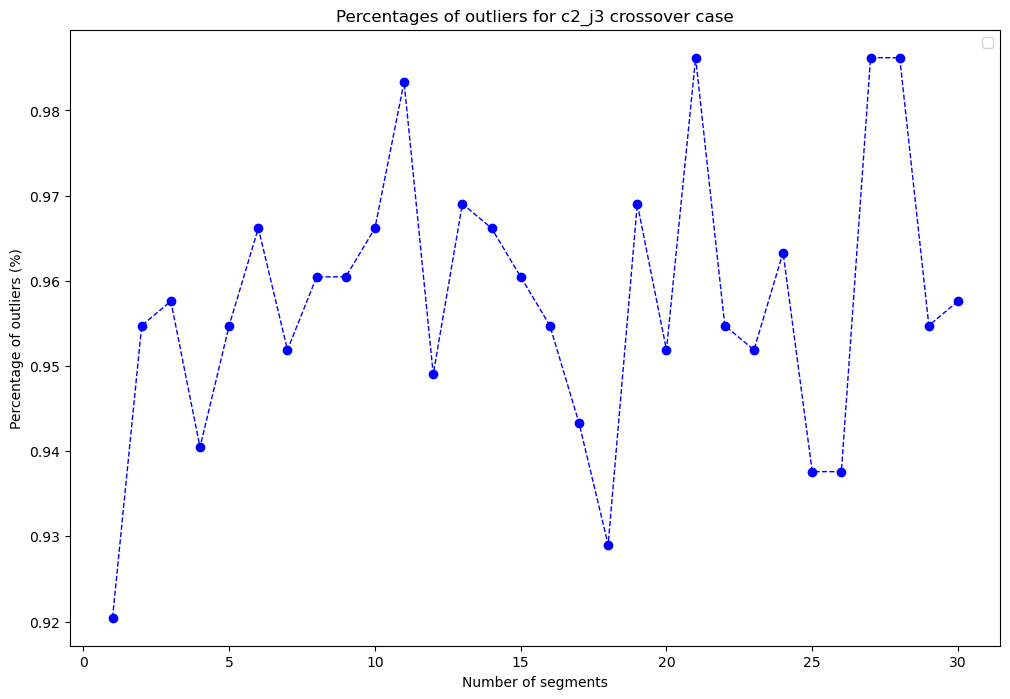

In [22]:
# outlier detection
import math


def getOutlierPct(sla_diff, num_seg):
    # print('\nnum_seg = ', num_seg)
    
    lst_1stIdxOfSeg = []
    n_xo_perSeg = math.floor(len(sla_diff) / num_seg)
    for i in range(num_seg):
        if i == 0:
            lst_1stIdxOfSeg.append(0)
        else:
            lst_1stIdxOfSeg.append(lst_1stIdxOfSeg[-1] + n_xo_perSeg)
    
    n_outlier = 0
    for i in range(num_seg):
        idx_st = lst_1stIdxOfSeg[i]
        if i == num_seg - 1:
            idx_end = len(sla_diff)
        else:
            idx_end = lst_1stIdxOfSeg[i+1]
        
        mean = np.mean(sla_diff.values[idx_st:idx_end])
        std  = np.std(sla_diff.values[idx_st:idx_end])
        # print('mean=', mean, ', std=', std)
        indices = np.where(abs(sla_diff.values[idx_st:idx_end] - mean) > 3.0*std)
        n_outlier += len(indices[0])
    
    return (n_outlier, 1.0*n_outlier / len(sla_diff))


n_outlier = []
pct = []
# lst_num_seg = [1, 2, 3, 5, 6, 10, 15, 30]
arr_x = np.arange(1, 31, 1, dtype=np.int32)
# print(arr_x)

for i in arr_x:  # range(1, 31): # range(len(lst_num_seg)):  
    n, p = getOutlierPct(sla_diff, i)
    n_outlier.append(n)
    pct.append(p)

print(n_outlier)
print(pct)


ax.clear()
ax.plot(arr_x, 100.0*np.asarray(pct), 'bo--', linewidth=1, markersize=6)
ax.set_xlabel('Number of segments')
ax.set_ylabel('Percentage of outliers (%)')
ax.set_title('Percentages of outliers for c2_j3 crossover case')
ax.legend()
fig
# fig.savefig('PercentageOfOutliers.png')

In [23]:
# outlier removal by 3-sigma criteria.
mean = np.mean(sla_diff.values)
std  = np.std(sla_diff.values)
print('mean=', mean, ', std=', std)
indices = np.where(abs(sla_diff.values - mean) > 3.0*std)
#print(len(indices[0]))
#print(indices[0])

# the following drop_isel will work without this assign_coords.
# ds_cx = ds_cx.assign_coords({'xover': np.arange(0, ds_cx.dims['xover'], 1, dtype=np.int32)})
# print('\n', ds_cx)
ds_cx = ds_cx.drop_isel(xover=indices[0])
# print('\n', ds_cx)


mean= -0.0008796243 , std= 0.04989594


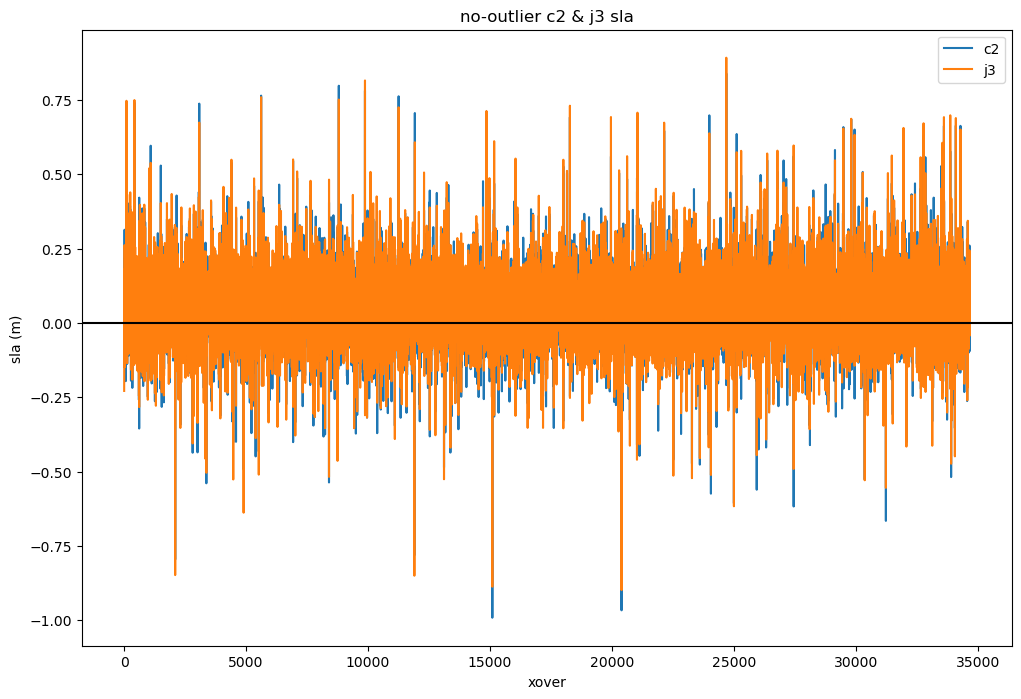

In [21]:
ax.clear()
ax.plot(x, ds_cx['sla'][:, 0], label='c2')
ax.plot(x, ds_cx['sla'][:, 1], label='j3')
ax.axhline(c='k') # if put it before the above plot, the line will be covered and not shown
ax.set_xlabel('xover')
ax.set_ylabel('sla (m)')
ax.set_title('no-outlier c2 & j3 sla')
ax.legend()
fig

34661


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


34661


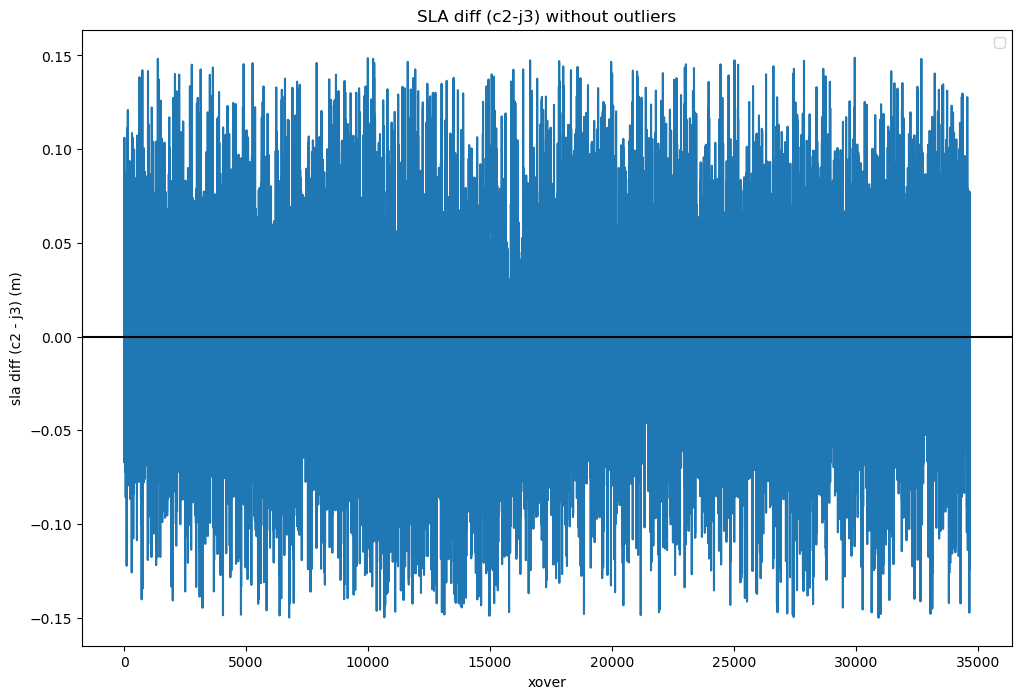

In [25]:
print(len(sla_diff))
x = range(ds_cx.dims['xover'])
sla_diff = ds_cx['sla'][:, 0] - ds_cx['sla'][:, 1]
print(len(sla_diff))

ax.clear()
ax.plot(x, sla_diff)
ax.axhline(c='k')
ax.set_xlabel('xover')
ax.set_ylabel('sla diff (c2 - j3) (m)')
ax.set_title('SLA diff (c2-j3) without outliers')
ax.legend()
fig
#fig.savefig('no-outlier_sla_diff_line.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


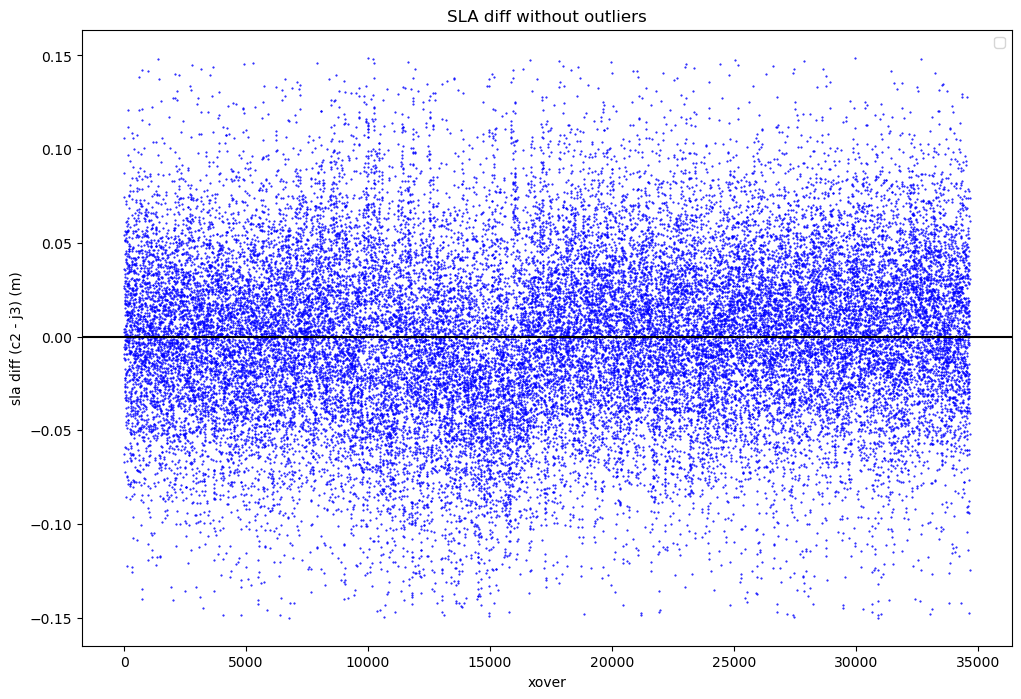

In [27]:
ax.clear()
ax.plot(x, sla_diff, 'bo', markersize=0.5)
ax.axhline(c='k')
ax.set_xlabel('xover')
ax.set_ylabel('sla diff (c2 - j3) (m)')
ax.set_title('SLA diff without outliers')
ax.legend()
fig
#fig.savefig('no-outlier_sla_diff_point.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


sla_diff_mean_xo_no_outlier =  -0.00094660005
sla_diff_std_xo_no_outlier =  0.045523185


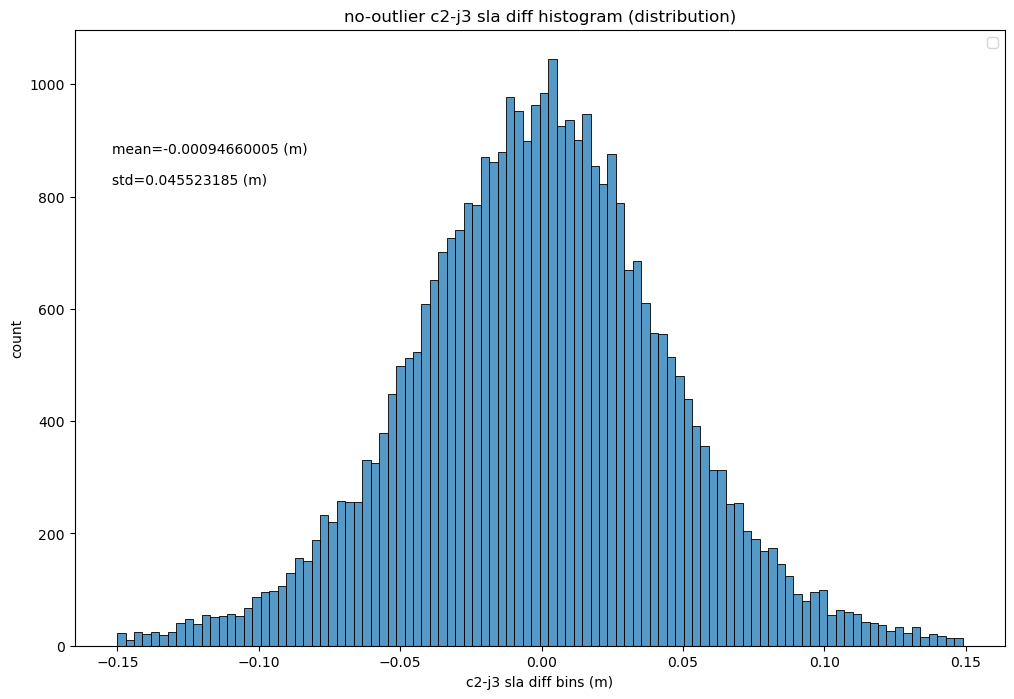

In [33]:
# calculate sla diff sla avg, std
sla_diff_mean_xo_no_outlier = np.mean(sla_diff.values)
sla_diff_std_xo_no_outlier = np.std(sla_diff.data)
print('sla_diff_mean_xo_no_outlier = ', sla_diff_mean_xo_no_outlier)
print('sla_diff_std_xo_no_outlier = ', sla_diff_std_xo_no_outlier)

ax.clear()
sns.histplot(sla_diff, bins=100, ax=ax)

# both use axis coords which is easier to control
ax.text(x=0.04, y=0.80, s='mean='+str(sla_diff_mean_xo_no_outlier)+' (m)', transform=ax.transAxes)  
ax.text(x=0.04, y=0.75, s='std='+str(sla_diff_std_xo_no_outlier)+' (m)', transform=ax.transAxes)  
ax.set_xlabel('c2-j3 sla diff bins (m)')
ax.set_ylabel('count')
ax.set_title('no-outlier c2-j3 sla diff histogram (distribution)')
ax.legend()
fig
# fig.savefig('no-outlier_sla_diff_histogram.png')

In [22]:
sla_xo_corr_no_outlier = xr.corr(ds_cx['sla'][:, 0], ds_cx['sla'][:, 1])
print('sla_xo_corr_no_outlier: ', sla_xo_corr_no_outlier.data)

sla_xo_rmsd_no_outlier = np.sqrt(np.mean((sla_diff.data)**2))
print('\nsla_xo_rmsd_no_outlier: ', sla_xo_rmsd_no_outlier)

sla_xo_corr_no_outlier:  0.8758228111435046

sla_xo_rmsd_no_outlier:  0.045533024


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


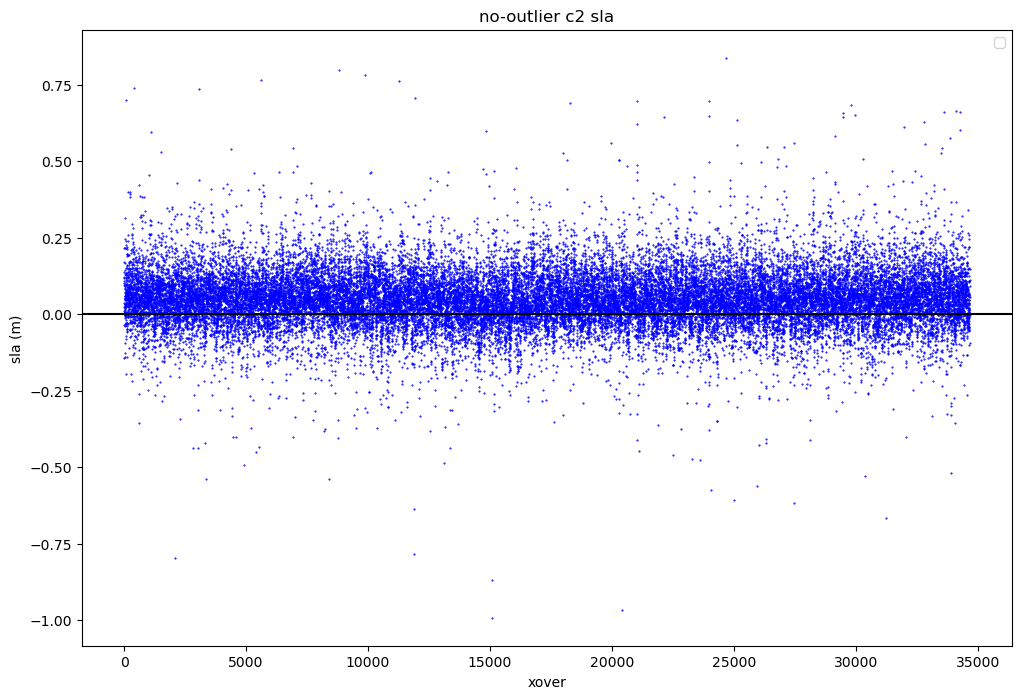

In [35]:
ax.clear()
ax.plot(x, ds_cx['sla'][:, 0], 'bo', markersize=0.5)
ax.axhline(color='k')
ax.set_xlabel('xover')
ax.set_ylabel('sla (m)')
ax.set_title('no-outlier c2 sla')
ax.legend()
fig
#fig.savefig('no-outlier_c2_sla_point.png')

c2_sla_mean_xo_no_outlier =  0.04928432
c2_sla_std_xo_no_outlier =  0.09244496


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


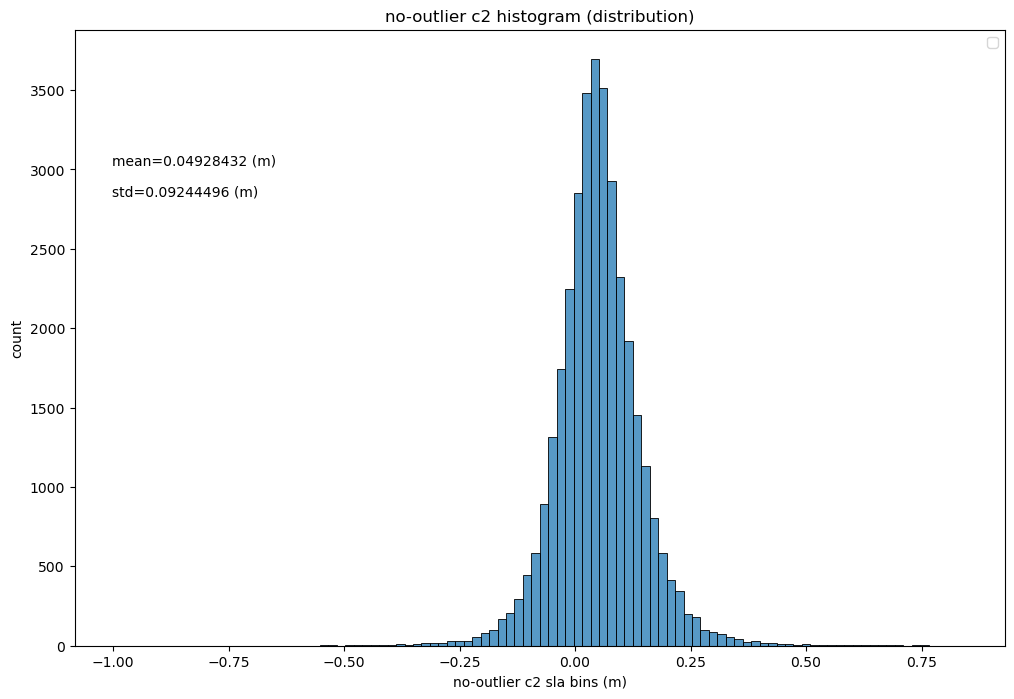

In [37]:
c2_sla_mean_xo_no_outlier = np.mean(ds_cx['sla'][:, 0].values)
c2_sla_std_xo_no_outlier = np.std(ds_cx['sla'][:, 0].data)
print('c2_sla_mean_xo_no_outlier = ', c2_sla_mean_xo_no_outlier)
print('c2_sla_std_xo_no_outlier = ', c2_sla_std_xo_no_outlier)

ax.clear()
sns.histplot(ds_cx['sla'][:, 0], bins=100, ax=ax)
ax.text(x=0.04, y=0.78, s='mean='+str(c2_sla_mean_xo_no_outlier)+' (m)', transform=ax.transAxes)
ax.text(x=0.04, y=0.73, s='std='+str(c2_sla_std_xo_no_outlier)+' (m)', transform=ax.transAxes)  # use axis coords
ax.set_xlabel('no-outlier c2 sla bins (m)')
ax.set_ylabel('count')
ax.set_title('no-outlier c2 histogram (distribution)')
ax.legend()
fig
#fig.savefig('no-outlier_c2_histogram.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


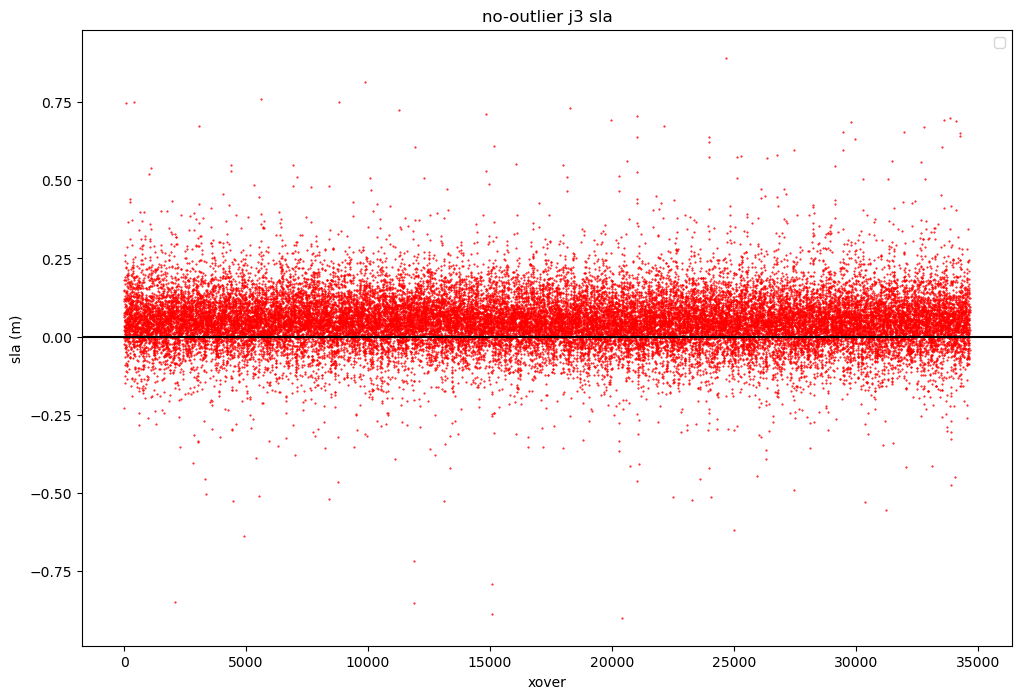

In [39]:
ax.clear()
ax.plot(x, ds_cx['sla'][:, 1], 'ro', markersize=0.5)
ax.axhline(color='k')
ax.set_xlabel('xover')
ax.set_ylabel('sla (m)')
ax.set_title('no-outlier j3 sla')
ax.legend()
fig
#fig.savefig('no-outlier_j3_sla_point.png')

j3_sla_mean_xo_no_outlier =  0.050230917
j3_sla_std_xo_no_outlier =  0.08999805


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


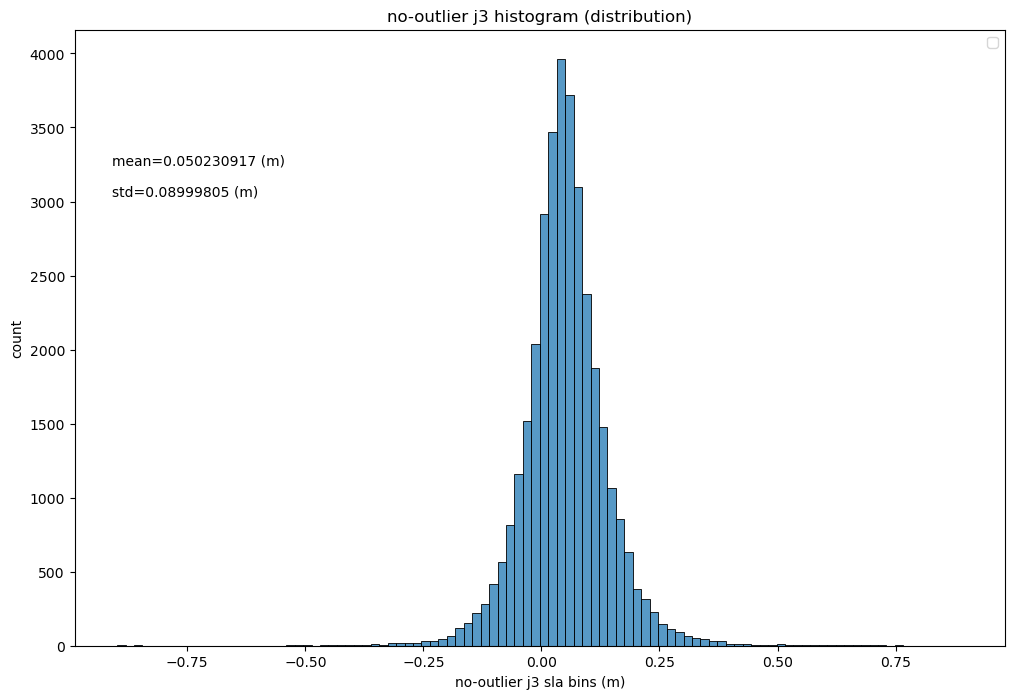

In [41]:
j3_sla_mean_xo_no_outlier = np.mean(ds_cx['sla'][:, 1].values)
j3_sla_std_xo_no_outlier = np.std(ds_cx['sla'][:, 1].data)
print('j3_sla_mean_xo_no_outlier = ', j3_sla_mean_xo_no_outlier)
print('j3_sla_std_xo_no_outlier = ', j3_sla_std_xo_no_outlier)

ax.clear()
sns.histplot(ds_cx['sla'][:, 1], bins=100, ax=ax)
ax.text(x=0.04, y=0.78, s='mean='+str(j3_sla_mean_xo_no_outlier)+' (m)', transform=ax.transAxes)
ax.text(x=0.04, y=0.73, s='std='+str(j3_sla_std_xo_no_outlier)+' (m)', transform=ax.transAxes)  # use axis coords
ax.set_xlabel('no-outlier j3 sla bins (m)')
ax.set_ylabel('count')
ax.set_title('no-outlier j3 histogram (distribution)')
ax.legend()
fig
#fig.savefig('no-outlier_j3_histogram.png')

In [42]:
# find the initial knots as the first and last xo points for each c2 arc, 
# add/subtract some knots later in the next cell.
da_c2_track = ds_cx['track'][:, 0]
print(len(da_c2_track))

unique_c2_track = np.unique(da_c2_track.values)
print('unique c2 track numbers: ', len(unique_c2_track))
arr_1stIdxOfPass = np.searchsorted(da_c2_track.values, unique_c2_track, side='left')
print(len(arr_1stIdxOfPass))
print(type(arr_1stIdxOfPass))
#print(arr_1stIdxOfPass)

#\delete the 1st index of pass (i.e. c2 arc) if it's the only crossover point on that pass,
# otherwise the 1st and the last xo points are the same which will cause fitting failure.
diff = np.diff(arr_1stIdxOfPass)
indices = np.where(diff <= 1)  # can NOT put + 1 here!
print('\n\n', indices)
arr_1stIdxOfPass = np.delete(arr_1stIdxOfPass, indices)
print(len(arr_1stIdxOfPass))
arr_1stIdxOfPass = np.append(arr_1stIdxOfPass, len(da_c2_track))  # need the last index
print(len(arr_1stIdxOfPass))
print(arr_1stIdxOfPass)


34661
unique c2 track numbers:  737
737
<class 'numpy.ndarray'>


 (array([448]),)
736
737
[    0    32    59    81   103   134   156   194   225   257   309   327
   347   361   383   407   418   433   479   506   546   579   622   655
   684   696   734   763   799   836   875   891   941   978  1024  1048
  1098  1122  1140  1175  1203  1240  1299  1324  1365  1411  1423  1464
  1496  1508  1538  1579  1601  1649  1684  1733  1763  1814  1834  1884
  1929  1969  2038  2052  2094  2118  2134  2165  2212  2246  2276  2339
  2381  2416  2465  2520  2586  2621  2635  2684  2713  2749  2780  2820
  2888  2935  3001  3041  3086  3117  3139  3173  3209  3245  3292  3368
  3408  3423  3486  3537  3575  3601  3636  3696  3718  3774  3785  3801
  3836  3854  3900  3972  4026  4086  4160  4195  4239  4259  4285  4331
  4381  4419  4470  4497  4576  4628  4705  4767  4831  4874  4908  4949
  5010  5056  5109  5184  5223  5304  5338  5418  5507  5553  5634  5667
  5693  5733  5795  5843  5910  5

In [43]:
# BE AWARE: the initial c2 time is not in ascending order! Sorted first above.
# check to add mid knot or skip the 2nd knot.
import math

def distance(lat1, lon1, lat2, lon2):
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    
    lat1, lon1 = math.radians(lat1), math.radians(lon1)
    lat2, lon2 = math.radians(lat2), math.radians(lon2)
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2)**2
    c = 2*math.asin(math.sqrt(a))
    
    # calculate and return the result
    return(c*r)


x_spl = []
y_spl = []
n_miss_2ndKnot = 0
n_add_midKnot = 0
for i in range (1, len(arr_1stIdxOfPass)):
    #print('\ni=', i)
    # c2 time already sorted, so the following two lines are not needed. It's tested. 
    #idxmin_loc = ds_cx['time'][arr_1stIdxOfPass[i-1] : arr_1stIdxOfPass[i], 0].argmin()
    #idxmax_loc = ds_cx['time'][arr_1stIdxOfPass[i-1] : arr_1stIdxOfPass[i], 0].argmax()
    idxmin_glo = arr_1stIdxOfPass[i-1]  # idxmin_loc should be 0
    idxmax_glo = arr_1stIdxOfPass[i] - 1
    idxmid_glo = math.floor((idxmin_glo + idxmax_glo)/2)
    #print('idxmin_glo=', idxmin_glo, ', arr_1stIdxOfPass[i-1]=', arr_1stIdxOfPass[i-1])
    #print('idxmax_glo=', idxmax_glo, ', arr_1stIdxOfPass[i]-1=', arr_1stIdxOfPass[i]-1)
    #if idxmin_glo != arr_1stIdxOfPass[i-1]:
        #print('ERROR: idxmin_glo != arr_1stIdxOfPass[i-1]')
    #if idxmax_glo != arr_1stIdxOfPass[i]-1:
        #print('ERROR: idxmax_glo != arr_1stIdxOfPass[i]-1')
    
    x_spl.append(ds_cx['time'].data[idxmin_glo, :])
    y_spl.append(sla_diff.data[idxmin_glo])
    
    lat1, lon1 = ds_cx['lat'][idxmin_glo], ds_cx['lon'][idxmin_glo]
    lat2, lon2 = ds_cx['lat'][idxmax_glo], ds_cx['lon'][idxmax_glo]
    dist = distance(lat1, lon1, lat2, lon2)
    # n_cx = arr_1stIdxOfPass[i] - arr_1stIdxOfPass[i-i]  # how come i-i? should be i-1?
    n_cx = arr_1stIdxOfPass[i] - arr_1stIdxOfPass[i-1]
    
    if dist < 5000 or n_cx < 10: 
        #print('Missing 2nd knot.')
        n_miss_2ndKnot += 1
        if i < len(arr_1stIdxOfPass) - 1: 
            continue  # skip the 2nd knot.
        # else if i == len(arr_1stIdxOfPass) - 1, need to add the last crossover node as a node, or the
        # fitted spline will be very high and large! see sla_diff_on_fitted_spl_v0.1.png
        # this if statement has effect, changed something. 
    
    if dist > 10000 and n_cx > 20:
        #print('Adding mid knot.')
        n_add_midKnot += 1
        x_spl.append(ds_cx['time'].data[idxmid_glo, :])
        y_spl.append(sla_diff.data[idxmid_glo])
    
    #print('Adding 2nd knot.')
    x_spl.append(ds_cx['time'].data[idxmax_glo, :])
    y_spl.append(sla_diff.data[idxmax_glo])

print('\n\n n_miss_2ndKnot = ', n_miss_2ndKnot, ', n_add_midKnot = ', n_add_midKnot, '\n\n')
print(len(x_spl))
print(len(x_spl[:][0]))  # not easy to slice for 2D list, but easy for numpy array.
# print(x_spl[0, :])  # list indices must be integers or slices, not tuple
# print(x_spl[:10, 0])  # list indices must be integers or slices, not tuple
x_spl = np.asarray(x_spl)
print(x_spl[:10, 0])  # works
#print(y_spl)
# exit()



 n_miss_2ndKnot =  72 , n_add_midKnot =  432 


1832
2
['2022-02-01T02:21:23.167927552' '2022-02-01T02:42:35.779201536'
 '2022-02-01T02:46:22.584331776' '2022-02-01T02:59:58.291026432'
 '2022-02-01T03:23:30.410659328' '2022-02-01T03:58:39.335962624'
 '2022-02-01T04:15:55.733040640' '2022-02-01T04:25:36.118194432'
 '2022-02-01T04:39:14.619066112' '2022-02-01T04:56:12.897013504']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


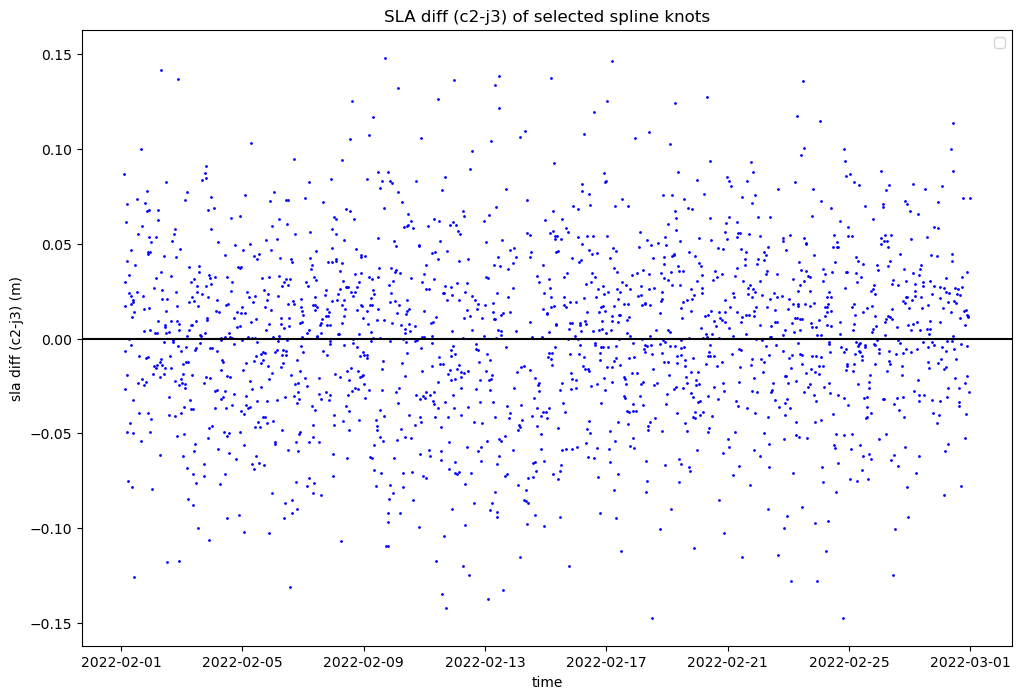

In [45]:
ax.clear()
# ax.plot(x_spl[:, 0], y_spl, 'bo--', linewidth=1, markersize=2)
ax.plot(x_spl[:, 0], y_spl, 'bo', markersize=1)
ax.axhline(c='k')
ax.set_xlabel('time')
ax.set_ylabel('sla diff (c2-j3) (m)')
ax.set_title('SLA diff (c2-j3) of selected spline knots')
ax.legend()
fig
# fig.savefig('no-outlier_spline_knots_point.png')

In [26]:

ref_time = np.datetime64('1985-01-01T00:00:00')

x_spl_flt = (x_spl - ref_time) / np.timedelta64(1, 's')
print(type(x_spl_flt))
print(x_spl_flt[:10, :])

w_t_spl = 1.0 - abs(x_spl_flt[:, 0] - x_spl_flt[:, 1])/(2*432000)
print(len(w_t_spl))
print(w_t_spl)

w_d_spl = 4.0 + 2.0*abs(x_spl_flt[:, 0] - x_spl_flt[:, 1])/(432000.0)
#print(len(w_d_spl))
#print(w_d_spl)
w_d_spl = 1.0/w_d_spl
print(len(w_d_spl))
print(w_d_spl)


# s=0, interpolating, closer but less smooth
# tck = scipy.interpolate.splrep(x_spl_flt[:1470, 0], y_spl[:1470], w_spl)

#tck_noW = scipy.interpolate.splrep(x_spl_flt[:150, 0], y_spl[:150])  # :100
tck_no_w_all_s_0 = scipy.interpolate.splrep(x_spl_flt[:, 0], y_spl[:])
#tck_noW_s1 = scipy.interpolate.splrep(x_spl_flt[:150, 0], y_spl[:150], s=0.1)
tck_no_w_all_s_01 = scipy.interpolate.splrep(x_spl_flt[:, 0], y_spl[:], s=0.1)  
tck_no_w_all_s_02 = scipy.interpolate.splrep(x_spl_flt[:, 0], y_spl[:], s=0.2)

#tck_w_t = scipy.interpolate.splrep(x_spl_flt[:100, 0], y_spl[:100], w_t_spl[:100], s=0)  
#tck_w_t_s1 = scipy.interpolate.splrep(x_spl_flt[:100, 0], y_spl[:100], w_t_spl[:100], s=0.1)
tck_w_t_all_s_005 = scipy.interpolate.splrep(x_spl_flt[:, 0], y_spl[:], w_t_spl[:], s=0.05)
tck_w_t_all_s_01 = scipy.interpolate.splrep(x_spl_flt[:, 0], y_spl[:], w_t_spl[:], s=0.1)

#tck_w_d = scipy.interpolate.splrep(x_spl_flt[:100, 0], y_spl[:100], w_d_spl[:100], s=0)
#tck_w_d_s1 = scipy.interpolate.splrep(x_spl_flt[:100, 0], y_spl[:100], w_d_spl[:100], s=0.1)
tck_w_d_all_s_001 = scipy.interpolate.splrep(x_spl_flt[:, 0], y_spl[:], w_d_spl[:], s=0.01)
tck_w_d_all_s_005 = scipy.interpolate.splrep(x_spl_flt[:, 0], y_spl[:], w_d_spl[:], s=0.05)


#print('len(tck_noW[0]): ', len(tck_noW[0]))
#print('tck_noW: \n', tck_noW)
# print('\n\n u: \n', u)

#print('len(tck_noW_s1[0]): ', len(tck_noW_s1[0]))
#print('tck_noW_s1: \n', tck_noW_s1)

#print('len(tck_w_t_s1[0]): ', len(tck_w_t_s1[0]))
#print('tck_w_t_s1: \n', tck_w_t_s1)

#print('len(tck_w_d[0]): ', len(tck_w_d[0]))
#print('tck_w_d: \n', tck_w_d)

#print('len(tck_w_d_s1[0]): ', len(tck_w_d_s1[0]))
#print('tck_w_d_s1: \n', tck_w_d_s1)

# tnew = pd.date_range(start=ds_cx['time'].data[lst_1stIdxOfPass[0], 0], end=ds_cx['time'].data[lst_1stIdxOfPass[-1], 0], freq='5T').to_numpy()
#tnew = pd.date_range(start=x_spl[0, 0], end=x_spl[150, 0], freq='5T').to_numpy()
tnew_all = pd.date_range(start=x_spl[0, 0], end=x_spl[-1, 0], freq='5T').to_numpy()

#tnew_flt = (tnew - ref_time) / np.timedelta64(1, 's')
#print(len(tnew_flt))
#print(tnew_flt)
tnew_all_flt = (tnew_all - ref_time) / np.timedelta64(1, 's')

#fitted_spl_noW = scipy.interpolate.splev(tnew_flt, tck_noW)
fitted_spl_no_w_all_s_0 = scipy.interpolate.splev (tnew_all_flt, tck_no_w_all_s_0)
#fitted_spl_noW_s1 = scipy.interpolate.splev(tnew_flt, tck_noW_s1)
fitted_spl_no_w_all_s_01 = scipy.interpolate.splev(tnew_all_flt, tck_no_w_all_s_01)
fitted_spl_no_w_all_s_02 = scipy.interpolate.splev(tnew_all_flt, tck_no_w_all_s_02)

#fitted_spl_w_t_s1 = scipy.interpolate.splev(tnew_flt, tck_w_t_s1)
fitted_spl_w_t_all_s_005 = scipy.interpolate.splev(tnew_all_flt, tck_w_t_all_s_005)
fitted_spl_w_t_all_s_01  = scipy.interpolate.splev(tnew_all_flt, tck_w_t_all_s_01 )

#fitted_spl_w_d_s1 = scipy.interpolate.splev(tnew_flt, tck_w_d_s1)
fitted_spl_w_d_all_s_001 = scipy.interpolate.splev(tnew_all_flt, tck_w_d_all_s_001)
fitted_spl_w_d_all_s_005 = scipy.interpolate.splev(tnew_all_flt, tck_w_d_all_s_005)

print('\n\n fitted_spl_no_w_all_s_0 [:10]: ', fitted_spl_no_w_all_s_0 [:10])
print('\n\n fitted_spl_no_w_all_s_01[:10]: ', fitted_spl_no_w_all_s_01[:10])
print('\n\n fitted_spl_no_w_all_s_02[:10]: ', fitted_spl_no_w_all_s_02[:10])
print('\n\n fitted_spl_w_t_all_s_005[:10]: ', fitted_spl_w_t_all_s_005[:10])
print('\n\n fitted_spl_w_t_all_s_01 [:10]: ', fitted_spl_w_t_all_s_01 [:10])
print('\n\n fitted_spl_w_d_all_s_001[:10]: ', fitted_spl_w_d_all_s_001[:10])
print('\n\n fitted_spl_w_d_all_s_005[:10]: ', fitted_spl_w_d_all_s_005[:10])

<class 'numpy.ndarray'>
[[1.17029648e+09 1.17033260e+09]
 [1.17029776e+09 1.17058056e+09]
 [1.17029798e+09 1.17065422e+09]
 [1.17029880e+09 1.17035755e+09]
 [1.17030021e+09 1.17063608e+09]
 [1.17030232e+09 1.17063163e+09]
 [1.17030336e+09 1.17041915e+09]
 [1.17030394e+09 1.17066099e+09]
 [1.17030475e+09 1.17062064e+09]
 [1.17030577e+09 1.17051092e+09]]
1832
[0.95819616 0.67267492 0.58769035 ... 0.7583183  0.85234812 0.96992582]
1832
[0.2399684  0.18834874 0.17701501 ... 0.20133984 0.21783609 0.24270097]


 fitted_spl_no_w_all_s_0 [:10]:  [ 0.0871     -0.08695252 -0.13050644 -0.09275867 -0.02290614  0.02985423
  0.03018243 -0.00215653 -0.03384894 -0.04473483]


 fitted_spl_no_w_all_s_01[:10]:  [ 0.08708061 -0.61602671 -0.65286885 -0.35131953 -0.03925251  0.01814558
 -0.00290952 -0.01625366 -0.02259001 -0.02262172]


 fitted_spl_no_w_all_s_02[:10]:  [ 0.08705785 -0.00811635 -0.02965573 -0.01251213  0.00836261  0.00463191
 -0.00534924 -0.01228701 -0.01594473 -0.0160857 ]


 fitted_spl_w_t

In [27]:
# calculate the first index of each day for the time of (spline knots, spline tnew_all, sla_diff of crossovers)
firstIdxDaily = [(0, 0, 0)]
for i in range(2, 29):
    print('i = ', i)
    str_dt = '2022-02-' + str(i).zfill(2) + 'T00:00:00.000'
    ref_time = np.datetime64(str_dt)
    idx_knot = np.searchsorted(x_spl[:, 0], ref_time)
    idx_spline = np.searchsorted(tnew_all, ref_time)
    idx_cx = np.searchsorted(ds_cx['time'].values[:, 0], ref_time)
    print('idx_knot = ', idx_knot, ', idx_spline = ', idx_spline, ', idx_cx = ', idx_cx)
    firstIdxDaily.append((idx_knot, idx_spline, idx_cx))

print('len(x_spl[:, 0]) = ', len(x_spl[:, 0]), ', len(tnew_all) = ', len(tnew_all), ', len(cx) = ', len(ds_cx['time'].values[:, 0]))

i =  2
idx_knot =  59 , idx_spline =  260 , idx_cx =  693
i =  3
idx_knot =  121 , idx_spline =  548 , idx_cx =  1535
i =  4
idx_knot =  193 , idx_spline =  836 , idx_cx =  2634
i =  5
idx_knot =  253 , idx_spline =  1124 , idx_cx =  3635
i =  6
idx_knot =  321 , idx_spline =  1412 , idx_cx =  4902
i =  7
idx_knot =  395 , idx_spline =  1700 , idx_cx =  6445
i =  8
idx_knot =  459 , idx_spline =  1988 , idx_cx =  7767
i =  9
idx_knot =  531 , idx_spline =  2276 , idx_cx =  9219
i =  10
idx_knot =  598 , idx_spline =  2564 , idx_cx =  10628
i =  11
idx_knot =  666 , idx_spline =  2852 , idx_cx =  11966
i =  12
idx_knot =  732 , idx_spline =  3140 , idx_cx =  13231
i =  13
idx_knot =  792 , idx_spline =  3428 , idx_cx =  14408
i =  14
idx_knot =  854 , idx_spline =  3716 , idx_cx =  15672
i =  15
idx_knot =  908 , idx_spline =  4004 , idx_cx =  16687
i =  16
idx_knot =  972 , idx_spline =  4292 , idx_cx =  18011
i =  17
idx_knot =  1047 , idx_spline =  4580 , idx_cx =  19649
i =  18
idx_

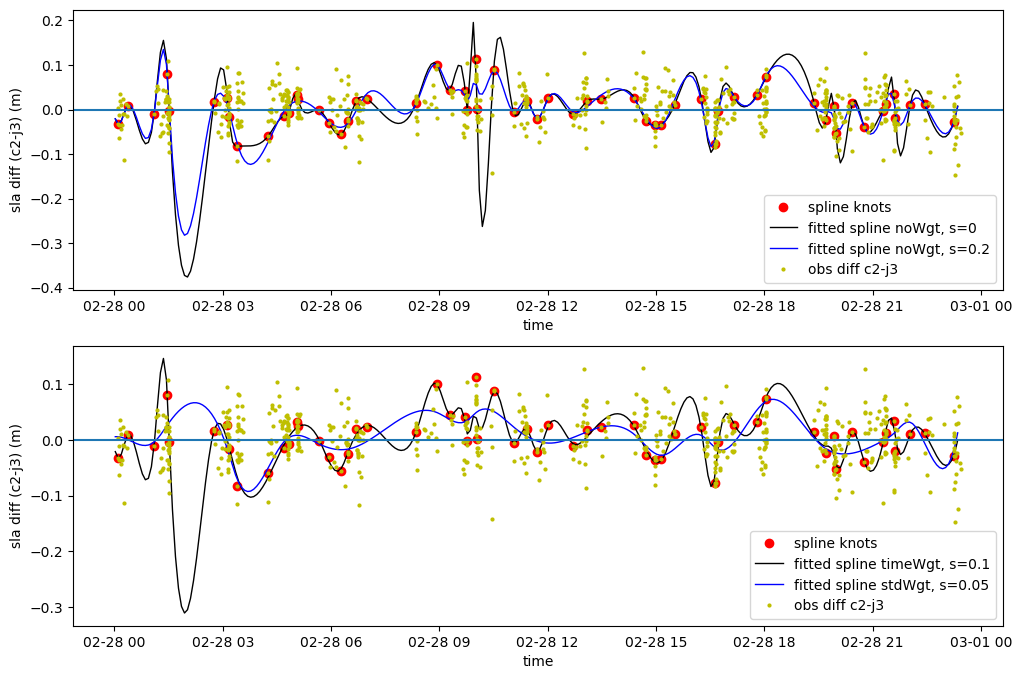

In [12]:

fig2, ax2 = plt.subplots(2, 1, figsize=(12, 8))

for i in range(1, 29):  # 1 ~ 27, initially 29
    idx_knot_st, idx_spline_st, idx_cx_st = firstIdxDaily[i-1][0], firstIdxDaily[i-1][1], firstIdxDaily[i-1][2]
    if i <= 27: 
        idx_knot_end, idx_spline_end, idx_cx_end = firstIdxDaily[i][0], firstIdxDaily[i][1], firstIdxDaily[i][2]
    elif i == 28:
        idx_knot_end, idx_spline_end, idx_cx_end = -1, -1, -1
    
    
    ax2[0].clear()
    ax2[1].clear()
    
    ax2[0].plot(x_spl[idx_knot_st:idx_knot_end, 0], y_spl[idx_knot_st:idx_knot_end], 'ro', markersize=6, label='spline knots')
    ax2[0].plot(tnew_all[idx_spline_st:idx_spline_end], fitted_spl_no_w_all_s_0 [idx_spline_st:idx_spline_end], 'k', linewidth=1, label='fitted spline noWgt, s=0'  )
    ax2[0].plot(tnew_all[idx_spline_st:idx_spline_end], fitted_spl_no_w_all_s_01[idx_spline_st:idx_spline_end], 'b', linewidth=1, label='fitted spline noWgt, s=0.1')  #0.1, 0.2
    ax2[0].plot(ds_cx['time'][idx_cx_st:idx_cx_end, 0], sla_diff.data[idx_cx_st:idx_cx_end], 'yo', markersize=2, label='obs diff c2-j3')
    ax2[0].axhline()
    ax2[0].set_xlabel('time')
    ax2[0].set_ylabel('sla diff (c2-j3) (m)')
    ax2[0].legend()

    ax2[1].plot(x_spl[idx_knot_st:idx_knot_end, 0], y_spl[idx_knot_st:idx_knot_end], 'ro', markersize=6, label='spline knots')
    ax2[1].plot(tnew_all[idx_spline_st:idx_spline_end], fitted_spl_w_t_all_s_005[idx_spline_st:idx_spline_end], 'k', linewidth=1, label='fitted spline timeWgt, s=0.05')  # 0.05, 0.1
    ax2[1].plot(tnew_all[idx_spline_st:idx_spline_end], fitted_spl_w_d_all_s_001[idx_spline_st:idx_spline_end], 'b', linewidth=1, label='fitted spline stdWgt, s=0.01')  # 0.01, 0.05
    ax2[1].plot(ds_cx['time'][idx_cx_st:idx_cx_end, 0], sla_diff.data[idx_cx_st:idx_cx_end], 'yo', markersize=2, label='obs diff c2-j3')
    ax2[1].axhline()
    ax2[1].set_xlabel('time')
    ax2[1].set_ylabel('sla diff (c2-j3) (m)')
    ax2[1].legend()
    
    fn = 'v01_c2_j3_splineFit_Feb' + str(i).zfill(2) + '.png'
    # fig2
    fig2.savefig(fn)
    
    
    ax2[0].clear()
    ax2[1].clear()
    
    ax2[0].plot(x_spl[idx_knot_st:idx_knot_end, 0], y_spl[idx_knot_st:idx_knot_end], 'ro', markersize=6, label='spline knots')
    ax2[0].plot(tnew_all[idx_spline_st:idx_spline_end], fitted_spl_no_w_all_s_0 [idx_spline_st:idx_spline_end], 'k', linewidth=1, label='fitted spline noWgt, s=0'  )
    ax2[0].plot(tnew_all[idx_spline_st:idx_spline_end], fitted_spl_no_w_all_s_02[idx_spline_st:idx_spline_end], 'b', linewidth=1, label='fitted spline noWgt, s=0.2')
    ax2[0].plot(ds_cx['time'][idx_cx_st:idx_cx_end, 0], sla_diff.data[idx_cx_st:idx_cx_end], 'yo', markersize=2, label='obs diff c2-j3')
    ax2[0].axhline()
    ax2[0].set_xlabel('time')
    ax2[0].set_ylabel('sla diff (c2-j3) (m)')
    ax2[0].legend()

    ax2[1].plot(x_spl[idx_knot_st:idx_knot_end, 0], y_spl[idx_knot_st:idx_knot_end], 'ro', markersize=6, label='spline knots')
    ax2[1].plot(tnew_all[idx_spline_st:idx_spline_end], fitted_spl_w_t_all_s_01 [idx_spline_st:idx_spline_end], 'k', linewidth=1, label='fitted spline timeWgt, s=0.1')  # 0.05, 0.1
    ax2[1].plot(tnew_all[idx_spline_st:idx_spline_end], fitted_spl_w_d_all_s_005[idx_spline_st:idx_spline_end], 'b', linewidth=1, label='fitted spline stdWgt, s=0.05')  # 0.01, 0.05
    ax2[1].plot(ds_cx['time'][idx_cx_st:idx_cx_end, 0], sla_diff.data[idx_cx_st:idx_cx_end], 'yo', markersize=2, label='obs diff c2-j3')
    ax2[1].axhline()
    ax2[1].set_xlabel('time')
    ax2[1].set_ylabel('sla diff (c2-j3) (m)')
    ax2[1].legend()
    
    fn = 'v02_c2_j3_splineFit_Feb' + str(i).zfill(2) + '.png'
    #fig2
    fig2.savefig(fn)

In [33]:
#\get adjusted c2 and write out in correct format for OISSH-JEDI
#\here it only corrects for the c2 sla from all of the crossovers, what we need is to correct all
# original c2 sla (not just the crossovers) regarding the time dimension, and the space (lat/lon) 
# does not matter here. will do it in the following cells.
#\next cell will plot such sla_diff on fitted splines at c2 crossover times, i.e. project the 
# old discrete sla_diff (c2-j3) onto the continuous spline.

ref_time = np.datetime64('1985-01-01T00:00:00')
c2_time_flt = (ds_cx['time'][:, 0] - ref_time) / np.timedelta64(1, 's')

sla_diff_on_fitted_spl_no_w_all_s_0  = scipy.interpolate.splev(c2_time_flt, tck_no_w_all_s_0)
sla_diff_on_fitted_spl_no_w_all_s_01 = scipy.interpolate.splev(c2_time_flt, tck_no_w_all_s_01)
sla_diff_on_fitted_spl_no_w_all_s_02 = scipy.interpolate.splev(c2_time_flt, tck_no_w_all_s_02)
sla_diff_on_fitted_spl_w_t_all_s_005 = scipy.interpolate.splev(c2_time_flt, tck_w_t_all_s_005)
sla_diff_on_fitted_spl_w_t_all_s_01  = scipy.interpolate.splev(c2_time_flt, tck_w_t_all_s_01 )
sla_diff_on_fitted_spl_w_d_all_s_001 = scipy.interpolate.splev(c2_time_flt, tck_w_d_all_s_001)
sla_diff_on_fitted_spl_w_d_all_s_005 = scipy.interpolate.splev(c2_time_flt, tck_w_d_all_s_005)

lst_sla_diff_on_fitted_spl = [sla_diff_on_fitted_spl_no_w_all_s_0, sla_diff_on_fitted_spl_no_w_all_s_01
                             , sla_diff_on_fitted_spl_no_w_all_s_02, sla_diff_on_fitted_spl_w_t_all_s_005
                             , sla_diff_on_fitted_spl_w_t_all_s_01, sla_diff_on_fitted_spl_w_d_all_s_001
                             , sla_diff_on_fitted_spl_w_d_all_s_005]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


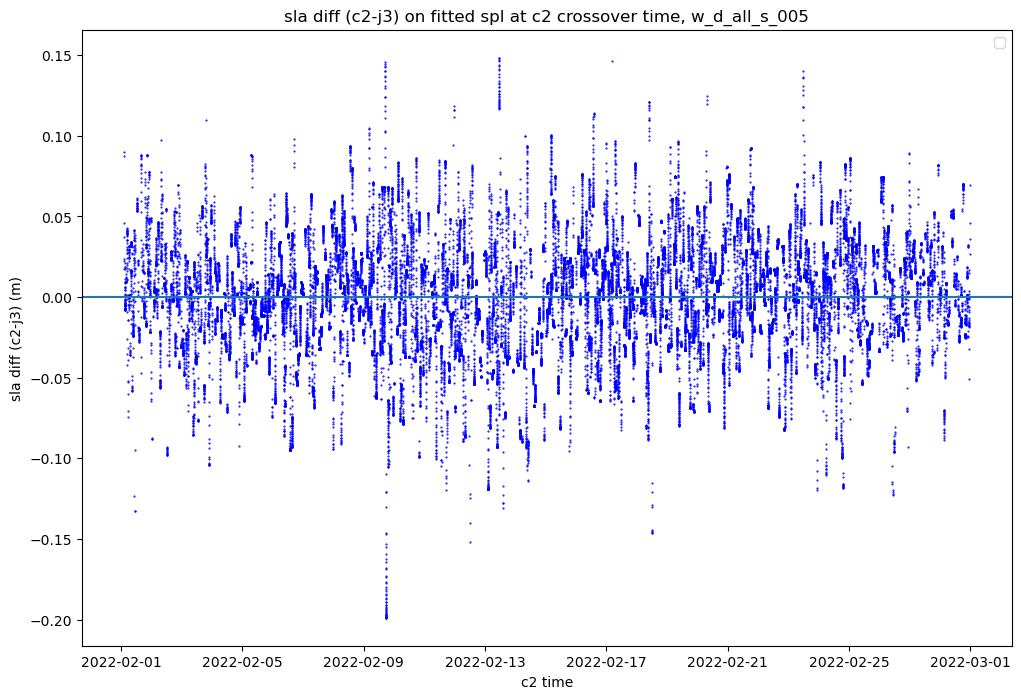

In [32]:
# plot the sla_diff at c2 crossover time on fitted spline, which is computed in the previous cell.

ax.clear()
# ax.plot(ds_cx['time'][:, 0], sla_diff_on_fitted_spl_w_d_all_s_005[:], 'bo--', linewidth=1, markersize=2)
ax.plot(ds_cx['time'][:, 0], sla_diff_on_fitted_spl_w_d_all_s_005[:], 'bo', markersize=0.5)
ax.axhline()
ax.set_xlabel('c2 time')
ax.set_ylabel('sla diff (c2-j3) (m)')
ax.set_title('sla diff (c2-j3) on fitted spl at c2 crossover time, w_d_all_s_005')
ax.legend()
fig
# fig.savefig('sla_diff_on_fitted_spl_w_d_all_s_005.png')

In [37]:
# calculate the adjusted crossover c2 with 7 fitting scinarios and then compare with the original one. 
c2_adj = []
for i in range(7):
    c2_adj.append(ds_cx['sla'][:, 0].data - lst_sla_diff_on_fitted_spl[i])

# print(c2_adj)
mean_std_c2_adj = []
for i in range(7):
    mean = np.mean(c2_adj[i])
    std = np.std(c2_adj[i])
    mean_std_c2_adj.append((mean, std))
    
print(mean_std_c2_adj)

[(0.04755532745027599, 0.10110436461537631), (0.047866108360945556, 0.09991798971142553), (0.04806142916579566, 0.09780894836536923), (0.04751900420386028, 0.09897993939614577), (0.04785103721484678, 0.09786497201868513), (0.04805586292501762, 0.09765980273474505), (0.048834301310697166, 0.0957144464641632)]


In [12]:
# will be used by the following cells

ref_time = np.datetime64('1985-01-01T00:00:00')
lst_tck = [('no_w_all_s_0', tck_no_w_all_s_0), 
           ('no_w_all_s_01', tck_no_w_all_s_01), 
           ('no_w_all_s_02', tck_no_w_all_s_02), 
           ('w_t_all_s_005', tck_w_t_all_s_005), 
           ('w_t_all_s_01', tck_w_t_all_s_01), 
           ('w_d_all_s_001', tck_w_d_all_s_001), 
           ('w_d_all_s_005', tck_w_d_all_s_005)]

In [13]:
# correct all original c2 obs from 2022 Feb. by the fitted splines

DIR_ROOT_OBS = '/glade/scratch/lgchen/data/OISSH_NOAA'  # 2000-2022_fromEric/2022
for i in range(1, 29):  # 29
    str_date = '202202' + str(i).zfill(2)
    print('Currently processing date: ', str_date)
    fn_c2_org = 'c2_' + str_date + '.nc'
    ds_c2_org = xr.open_dataset(filename_or_obj = DIR_ROOT_OBS + '/2000-2022_fromEric/2022/' + fn_c2_org, mask_and_scale = True, decode_times = True)
    c2_time_flt = (ds_c2_org['time_mjd'] - ref_time) / np.timedelta64(1, 's')
    #da_c2_sla_org = ds_c2_org['sla'].copy(deep=True)
    np_arr_c2_sla_org = ds_c2_org['sla'].data.copy()
    # lst_sla_diff = []
    
    for (str_tck, tck) in lst_tck:
        sla_diff = scipy.interpolate.splev(c2_time_flt, tck)
      # print(da_c2_sla_org.data[:100])
        ds_c2_org['sla'].data = np_arr_c2_sla_org - sla_diff.data  # need to keep the original c2 sla, how?
        fn_c2_corrected = 'c2_corrected_by_j3_' + str_date + '_' + str_tck + '.nc'
        ds_c2_org.to_netcdf(fn_c2_corrected, format="NETCDF3_CLASSIC")
        # break

Currently processing date:  20220201
Currently processing date:  20220202
Currently processing date:  20220203
Currently processing date:  20220204
Currently processing date:  20220205
Currently processing date:  20220206
Currently processing date:  20220207
Currently processing date:  20220208
Currently processing date:  20220209
Currently processing date:  20220210
Currently processing date:  20220211
Currently processing date:  20220212
Currently processing date:  20220213
Currently processing date:  20220214
Currently processing date:  20220215
Currently processing date:  20220216
Currently processing date:  20220217
Currently processing date:  20220218
Currently processing date:  20220219
Currently processing date:  20220220
Currently processing date:  20220221
Currently processing date:  20220222
Currently processing date:  20220223
Currently processing date:  20220224
Currently processing date:  20220225
Currently processing date:  20220226
Currently processing date:  20220227
C

In [17]:
# compare the corrected c2 and the original c2

DIR_ROOT_OBS = '/glade/scratch/lgchen/data/OISSH_NOAA'  # 2000-2022_fromEric/2022
for i in range(2, 29):  # 29
    str_date = '202202' + str(i).zfill(2)
    print('Currently processing date: ', str_date)
    fn_c2_org = 'c2_' + str_date + '.nc'
    ds_c2_org = xr.open_dataset(filename_or_obj = DIR_ROOT_OBS + '/2000-2022_fromEric/2022/' + fn_c2_org, mask_and_scale = True, decode_times = True)
  # print(ds_c2_org['sla'].data[:10])
  # c2_time_flt = (ds_c2_org['time_mjd'] - ref_time) / np.timedelta64(1, 's')
  # da_c2_sla_org = ds_c2_org['sla'].copy(deep=True)
  # np_arr_c2_sla_org = ds_c2_org['sla'].data.copy()
    
    lst_ds_c2_crc = []
    for (str_tck, tck) in lst_tck:
        fn_c2_crc = 'c2_corrected_by_j3_' + str_date + '_' + str_tck + '.nc'
        ds_c2_crc = xr.open_dataset(filename_or_obj = DIR_ROOT_OBS 
            + '/biasCorrection_crossoverAdjustment/correctedCrossovers_byLigang/c2_corrected_by_j3_for_all_nc3_format_ok/' 
            + fn_c2_crc, mask_and_scale = True, decode_times = True)
        lst_ds_c2_crc.append(ds_c2_crc)
      # print(ds_c2_crc['sla'].data[:10])
        
        ax.clear()
        ax.plot(ds_c2_org['time_mjd'], ds_c2_org['sla'], 'k', linewidth=1, label='c2 original')
        ax.plot(ds_c2_crc['time_mjd'], ds_c2_crc['sla'], 'b', linewidth=1, label='c2 corrected ' + str_tck)
        ax.axhline()
        ax.set_xlabel('c2 time')
        ax.set_ylabel('c2 original vs. corrected (m)')
        ax.set_title('c2 original & corrected, ' + str_date + ', ' + str_tck)
        ax.legend()
        # fig
        fig.savefig('c2_original_corrected_' + str_date + '_' + str_tck + '.png')
        # break

Currently processing date:  20220202
Currently processing date:  20220203
Currently processing date:  20220204
Currently processing date:  20220205
Currently processing date:  20220206
Currently processing date:  20220207
Currently processing date:  20220208
Currently processing date:  20220209
Currently processing date:  20220210
Currently processing date:  20220211
Currently processing date:  20220212
Currently processing date:  20220213
Currently processing date:  20220214
Currently processing date:  20220215
Currently processing date:  20220216
Currently processing date:  20220217
Currently processing date:  20220218
Currently processing date:  20220219
Currently processing date:  20220220
Currently processing date:  20220221
Currently processing date:  20220222
Currently processing date:  20220223
Currently processing date:  20220224
Currently processing date:  20220225
Currently processing date:  20220226
Currently processing date:  20220227
Currently processing date:  20220228
